In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print("done")

done


## Data Reading & understanding (Pre-prep)

In [3]:
sheet_id = '1LkJkSWEEFcEjOqhLcCcW723-T7v_vG58Dt6qcywoUR8'
sheet_name = 'stores_sales_forecasting'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
salesdf = pd.read_csv(url)
salesdf.head()

#https://docs.google.com/spreadsheets/d/1LkJkSWEEFcEjOqhLcCcW723-T7v_vG58Dt6qcywoUR8/edit#gid=603870854

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
salesdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,2121.0,5041.643564,2885.740258,1.0000,2568.000,5145.0000,7534.0000,9991.000
Postal Code,2121.0,55726.556341,32261.888225,1040.0000,22801.000,60505.0000,90032.0000,99301.000
Sales,2121.0,349.834887,503.179145,1.8920,47.040,182.2200,435.1680,4416.174
Quantity,2121.0,3.785007,2.251620,1.0000,2.000,3.0000,5.0000,14.000
Discount,2121.0,0.173923,0.181547,0.0000,0.000,0.2000,0.3000,0.700
Profit,2121.0,8.699327,136.049246,-1862.3124,-12.849,7.7748,33.7266,1013.127


In [6]:
duplicate_rows = salesdf[salesdf.duplicated()]
duplicate_rows.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [7]:
print(salesdf.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
#Melihat Data Uniq
distinct_values = salesdf.nunique()
print(distinct_values)

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64


In [9]:
for col_name in ['Ship Mode', 'Segment', 'Region','Country', 'Category', 'Sub-Category']:
    print(salesdf[col_name].value_counts(), '\n')

Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64 

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64 

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64 

Country
United States    2121
Name: count, dtype: int64 

Category
Furniture    2121
Name: count, dtype: int64 

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64 



## Data Prepping
Proses data preparasi merupakan proses data treatment menuju model berkualitas yang berguna. Tahapan ini adalah yang paling menguras resources dari tim analisis. Beberapa hal yang umum dilakukan pada tahapan ini adalah:

1. Melakukan pengecekan kembali pada kebenaran data
2. Mengelola data outlier
3. Memberlakukan data missing dan data inkonsistensi

In [10]:
salesdf2 = salesdf.copy()
salesdf2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [11]:
salesdf2 = salesdf2.drop(columns=['Row ID'])
salesdf2.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [12]:
cols = salesdf2.columns
cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Changing Dtypes on order date

In [13]:
salesdf2['Order Date'] = pd.to_datetime(salesdf['Order Date'])
salesdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2121 non-null   object        
 1   Order Date     2121 non-null   datetime64[ns]
 2   Ship Date      2121 non-null   object        
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Product Name   2121 n

### Checking Outlier

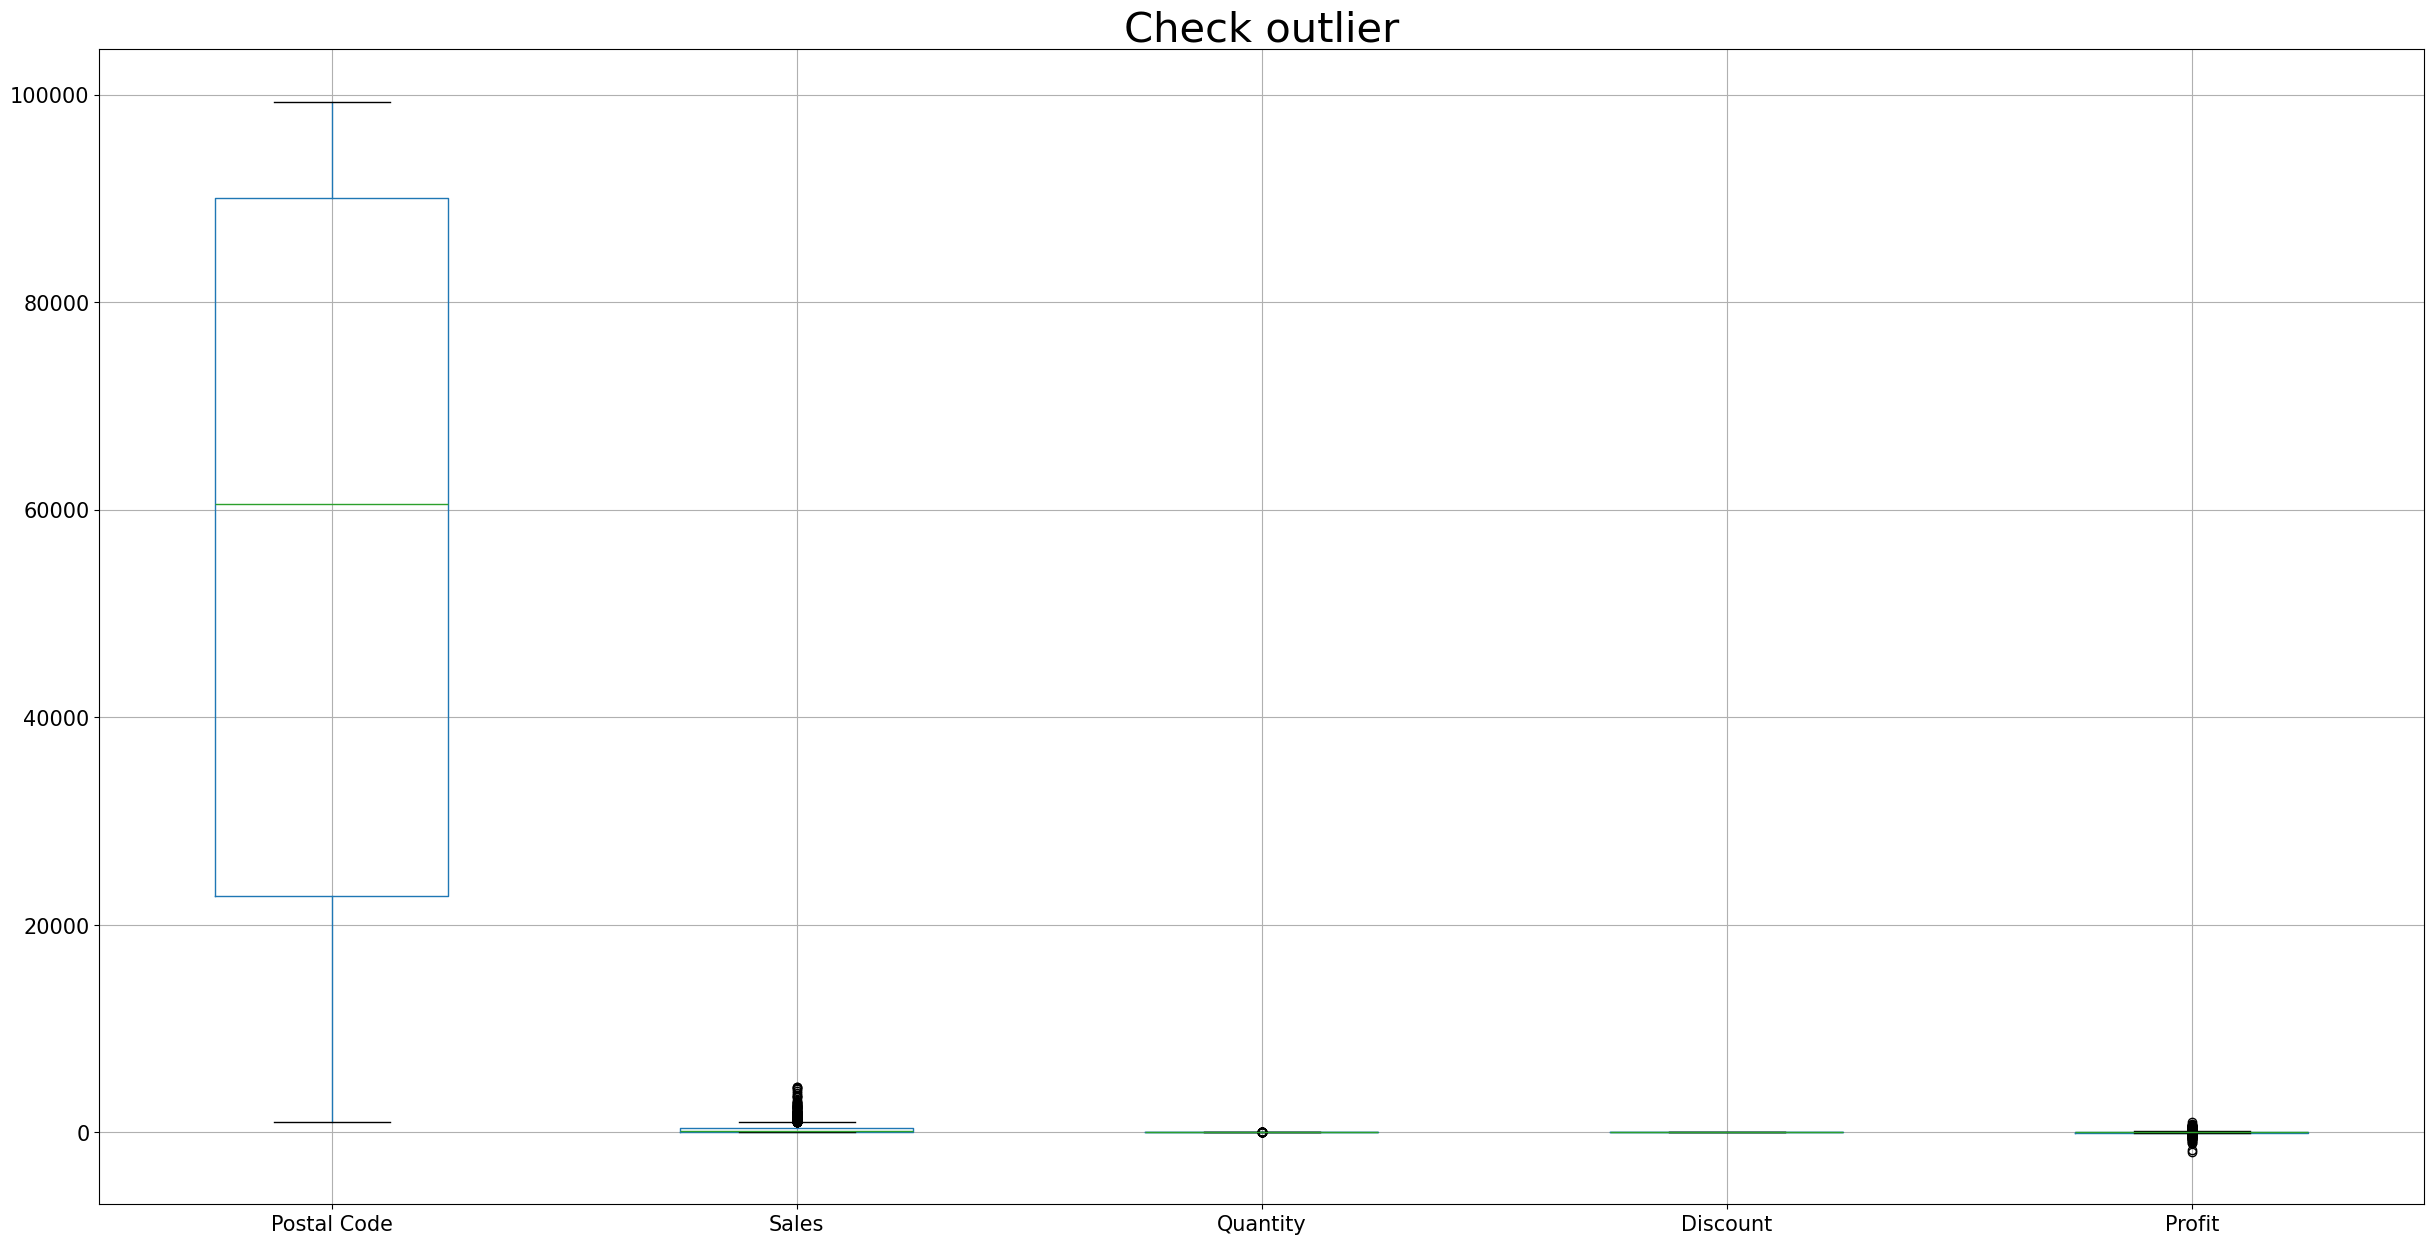

In [14]:
#Melihat data outlier
salesdf2[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check outlier" , fontsize=30)
plt.show()

#### Remove Outlier

In [15]:
## define a function for quartil

def outlier(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [16]:
## create an empaty list to stode the output indices from multiple columns

index_list = []

for feature in ['Sales', 'Profit']:
    index_list.extend(outlier(salesdf2,feature))

In [17]:
index_list

[4,
 6,
 7,
 35,
 37,
 56,
 60,
 79,
 80,
 83,
 85,
 100,
 119,
 121,
 135,
 153,
 173,
 175,
 183,
 191,
 195,
 204,
 207,
 210,
 213,
 226,
 234,
 238,
 259,
 261,
 301,
 302,
 307,
 318,
 324,
 326,
 344,
 352,
 359,
 366,
 370,
 408,
 412,
 425,
 465,
 486,
 487,
 488,
 514,
 515,
 522,
 529,
 530,
 539,
 552,
 591,
 596,
 598,
 616,
 649,
 664,
 723,
 734,
 737,
 750,
 784,
 792,
 794,
 812,
 823,
 875,
 882,
 909,
 919,
 924,
 1015,
 1025,
 1033,
 1045,
 1047,
 1059,
 1066,
 1070,
 1073,
 1099,
 1108,
 1119,
 1129,
 1162,
 1165,
 1167,
 1172,
 1194,
 1221,
 1222,
 1223,
 1232,
 1233,
 1235,
 1276,
 1277,
 1279,
 1280,
 1290,
 1295,
 1312,
 1365,
 1372,
 1391,
 1392,
 1442,
 1445,
 1447,
 1448,
 1450,
 1451,
 1452,
 1457,
 1486,
 1517,
 1551,
 1573,
 1577,
 1579,
 1586,
 1617,
 1622,
 1623,
 1633,
 1644,
 1651,
 1657,
 1689,
 1693,
 1733,
 1736,
 1748,
 1750,
 1755,
 1791,
 1802,
 1822,
 1824,
 1868,
 1869,
 1882,
 1909,
 1923,
 1926,
 1950,
 1967,
 1999,
 2001,
 2003,
 2014,
 202

In [18]:
def remove(salesdf2,ls):
    ls = sorted(set(ls))
    salesdf2 = salesdf2.drop(ls)
    return salesdf2

In [19]:
salesdf2 = remove(salesdf2, index_list)
salesdf2.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,1681,2016-05-05 02:38:28.625817856,2014-01-07 00:00:00,2015-05-31 00:00:00,2016-07-02 00:00:00,2017-05-19 00:00:00,2017-12-30 00:00:00,NaN
Postal Code,1681.0,56384.760857,1040.0,23223.0,60610.0,90036.0,99207.0,32538.553231
Sales,1681.0,186.334759,1.892,34.504,113.888,272.94,1013.832,200.192823
Quantity,1681.0,3.368233,1.0,2.0,3.0,4.0,14.0,1.96836
Discount,1681.0,0.158953,0.0,0.0,0.2,0.2,0.6,0.169661
Profit,1681.0,10.075124,-81.94,-5.4548,7.8176,23.9904,102.9528,32.585664


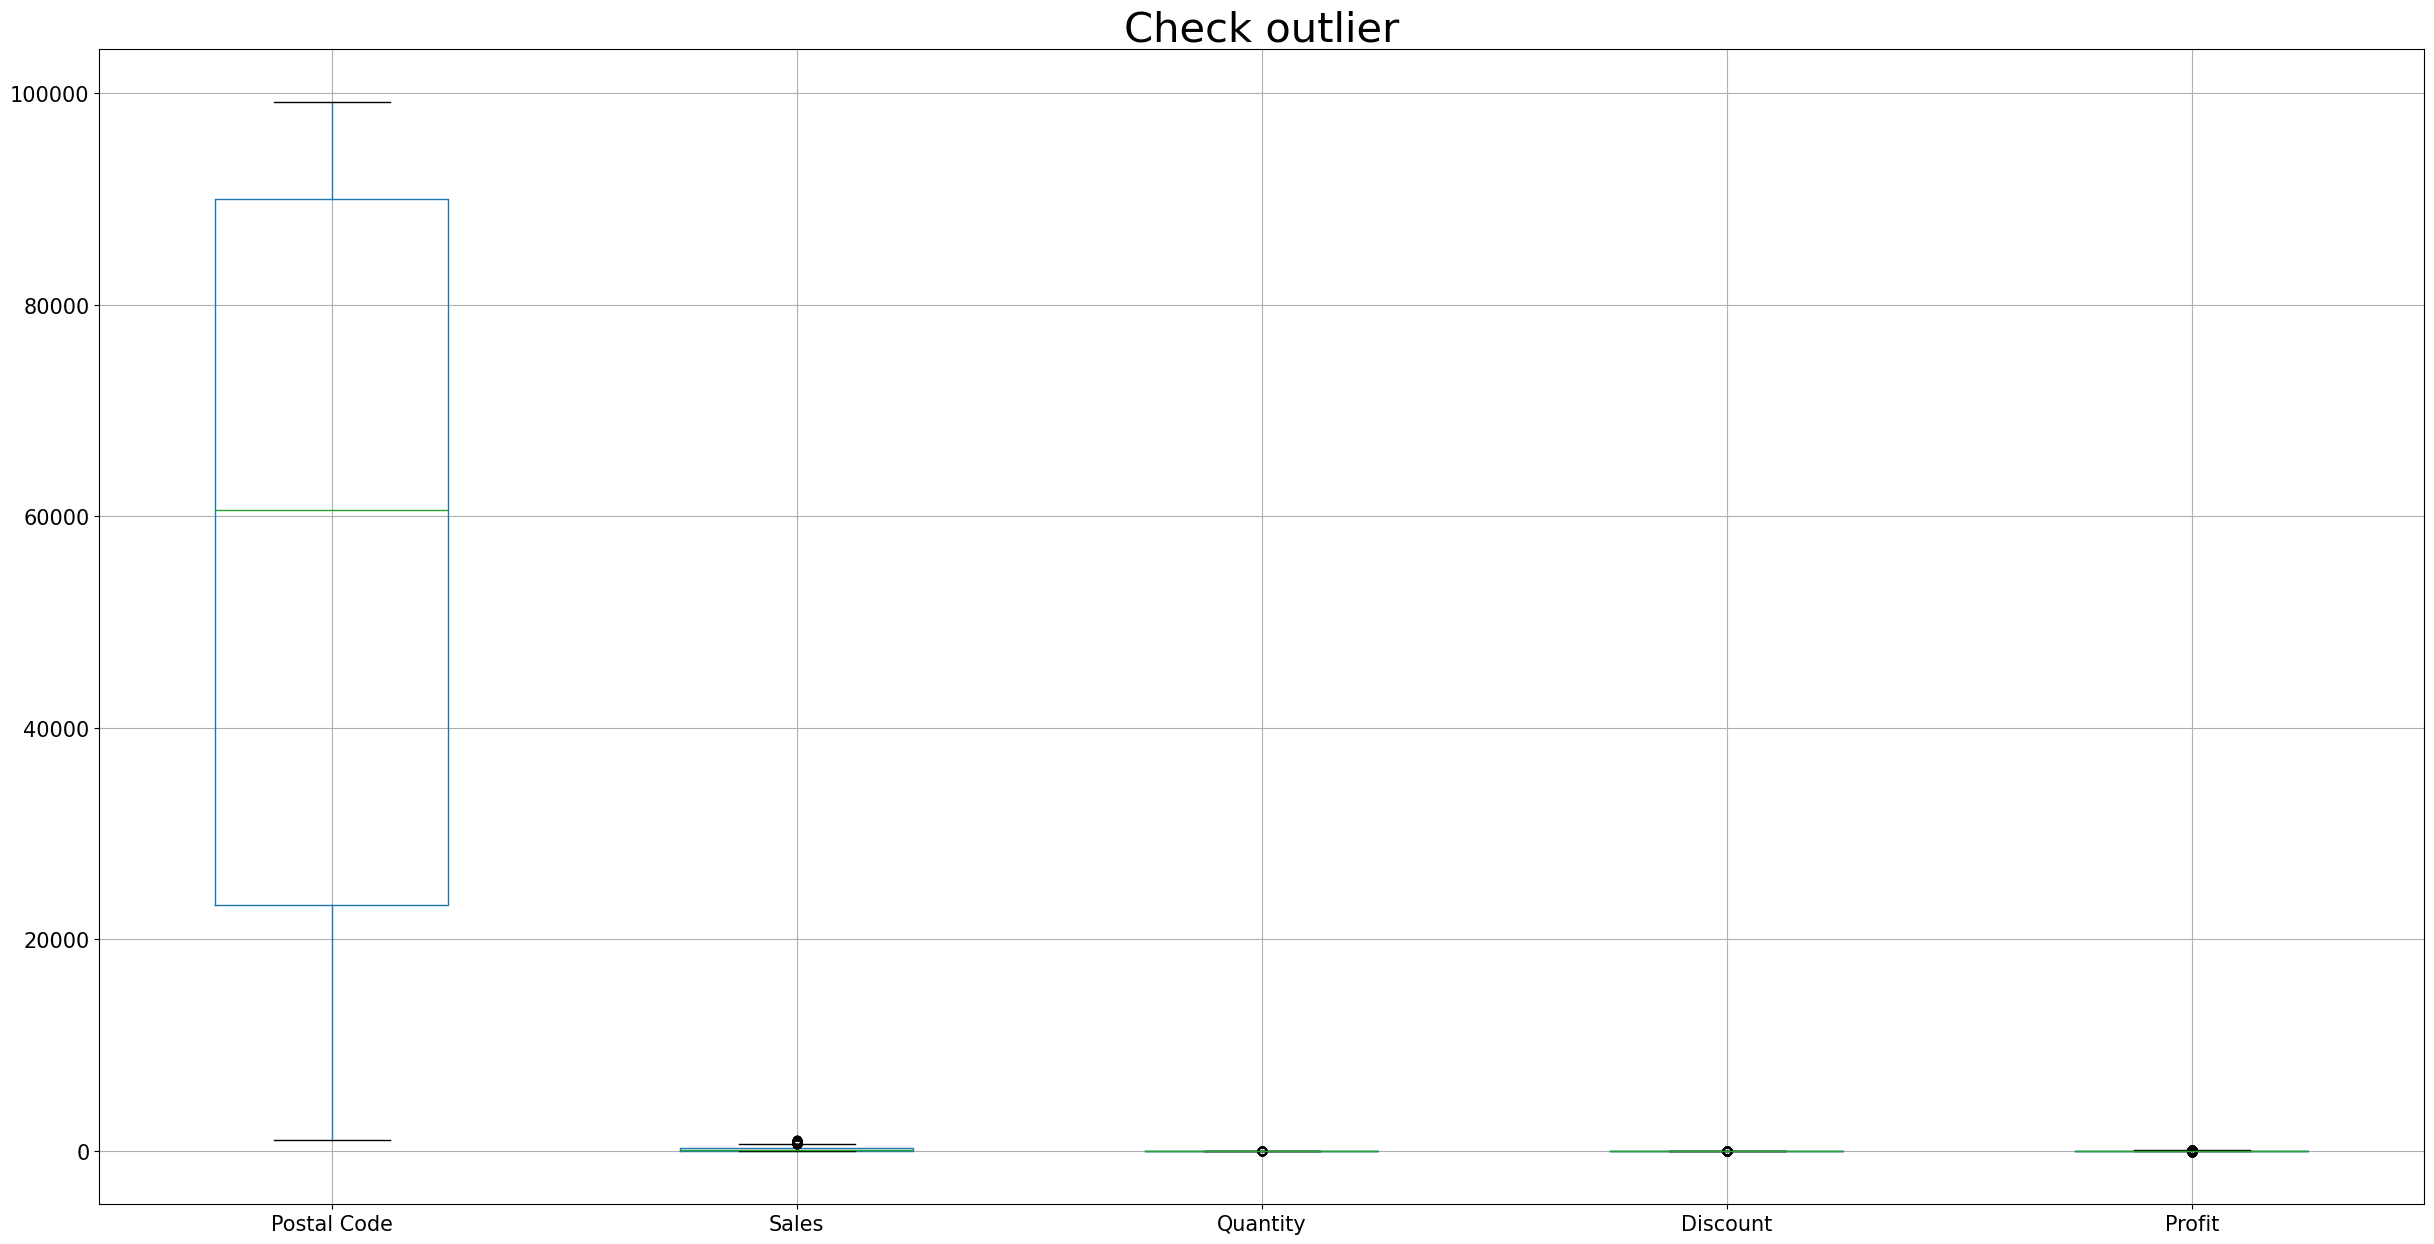

In [20]:
#Melihat data outlier
salesdf2[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check outlier" , fontsize=30)
plt.show()

In [21]:
from scipy import stats
import statistics

mean = np.mean(salesdf2['Sales'])
median = np.median(salesdf2['Sales'])
mode = statistics.mode(salesdf2['Sales'])

print('Mean :',mean,'\nMedian :',median, '\nMode :', mode)

Mean : 186.33475871505058 
Median : 113.888 
Mode : 6.16


In [22]:
cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
shipmode = salesdf2.groupby('Ship Mode', as_index=True)['Sales'].count()
shipmode.sort_values(ascending=False)

Ship Mode
Standard Class    980
Second Class      341
First Class       266
Same Day           94
Name: Sales, dtype: int64

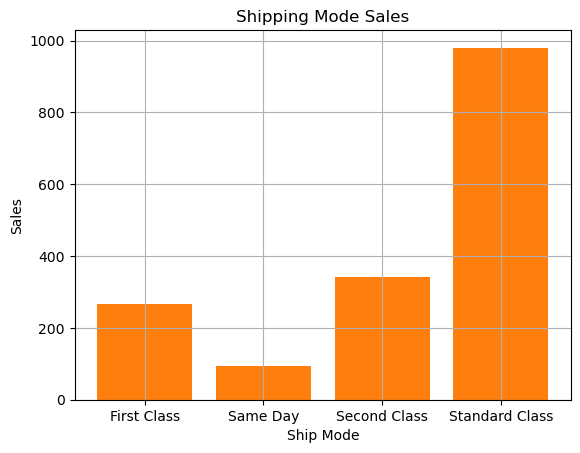

In [25]:
#plt.figure(figsize=(10, 6))
plt.bar(shipmode.index, shipmode.values)
plt.title('Shipping Mode Sales')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
#series_sales = salesdf2.groupby('Sub-Category', as_index=False).agg({"Sales" : "sum", "Row ID" : "nunique"})
#series_sales.sort_values('Sales', ascending=False).head(10)

series_sales = salesdf2.groupby('Sub-Category', as_index=True)['Sales'].count()
series_sales.sort_values(ascending=False)

Sub-Category
Furnishings    910
Chairs         466
Bookcases      160
Tables         145
Name: Sales, dtype: int64

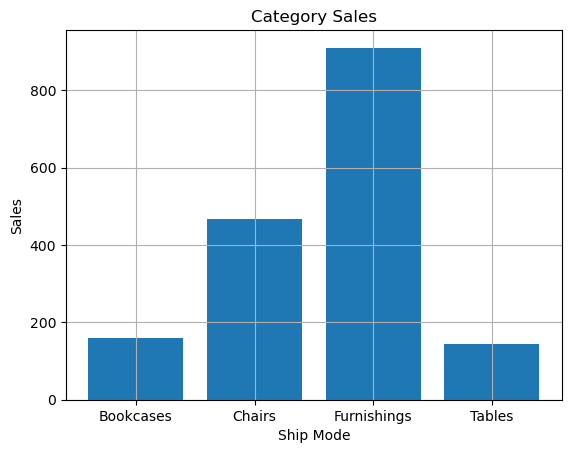

In [ ]:
#plt.figure(figsize=(10, 6))
plt.bar(series_sales.index, series_sales.values)
plt.title('Category Sales')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
sales = salesdf2.drop(columns=['Order ID', 'Country', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
                         'Postal Code', 'Product ID', 'Product Name', 'Sub-Category', 'Category', 'Region', 'State'])
sales.head(3)

,Order Date,Sales,Quantity,Discount,Profit
0,2016-11-08,261.960,2,0.0,41.9136
3,2014-06-09,48.860,7,0.0,14.1694
5,2017-07-16,71.372,2,0.3,-1.0196


In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales.set_index('Order Date', inplace=True)

In [ ]:
monthly_sales = sales['Sales'].resample('M').sum()
monthly_sales

Order Date
2014-01-31     2419.2950
2014-02-28      583.4380
2014-03-31     4502.2730
2014-04-30     3270.5270
2014-05-31     3355.9190
2014-06-30     5051.7376
2014-07-31     5782.1290
2014-08-31     2599.0960
2014-09-30     8540.2790
2014-10-31     4415.4730
2014-11-30    12185.4717
2014-12-31    12142.7505
2015-01-31     1560.6820
2015-02-28     1865.5540
2015-03-31     4695.9806
2015-04-30     4387.4705
2015-05-31     3814.6615
2015-06-30     3788.2560
2015-07-31     8015.9050
2015-08-31     4208.5750
2015-09-30     6640.5930
2015-10-31     7518.8100
2015-11-30    11981.4370
2015-12-31     9080.1012
2016-01-31     3524.1910
2016-02-29     3059.1510
2016-03-31     6194.8410
2016-04-30     4783.0860
2016-05-31     4351.8970
2016-06-30     5676.1150
2016-07-31     8551.6540
2016-08-31     4803.9958
2016-09-30    13206.3645
2016-10-31     7474.7210
2016-11-30    10262.9750
2016-12-31    10195.7240
2017-01-31     4434.7520
2017-02-28     4579.3614
2017-03-31     5604.2648
2017-04-30    

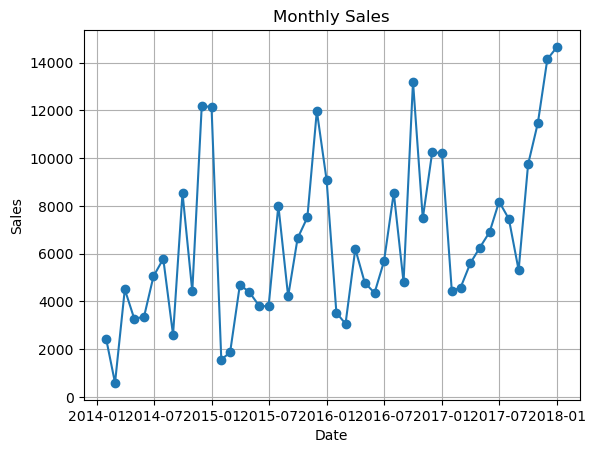

In [ ]:
#plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

scatter_plot = px.scatter(sales, x='Sales', y='Profit', color='Sales', size='Discount', title='Sales vs Profit')
scatter_plot.update_layout(
    width=800,  
    height=600  
)
scatter_plot.show()